# Define the pdfs

We need to ensure that the pdfs are properly truncated

In [30]:
import scipy
from scipy.stats import crystalball, truncexpon, uniform, truncnorm
import matplotlib.pyplot as plt
import numpy as np

In [77]:
#define the parameters
mu = 3
sigma = 0.3
beta = 1
m = 1.4
f = 0.6
lmbda = 0.3
mu_b = 0
sigma_b = 2.5

#define upper and lower limits
X_ulim = 5
X_llim = 0
Y_ulim = 10
Y_llim = 0

def g_s(X):
    return crystalball.pdf(X, beta, m, mu, sigma) / (crystalball.cdf(X_ulim, beta, m, mu, sigma) - crystalball.cdf(X_llim, beta, m, mu, sigma))

def h_s(Y):
    trunc_b = (Y_ulim - Y_llim)*lmbda
    return truncexpon.pdf(Y, trunc_b, Y_llim, 1/lmbda)

def g_b(X):
    return uniform.pdf(X, X_llim, X_ulim)

def h_b(Y):
    a = (mu_b - Y_llim)/sigma_b
    b = (Y_ulim - mu_b)/sigma_b
    return truncnorm.pdf(Y, a, b, mu_b, sigma_b)

Plot these pdfs to visualise what they look like

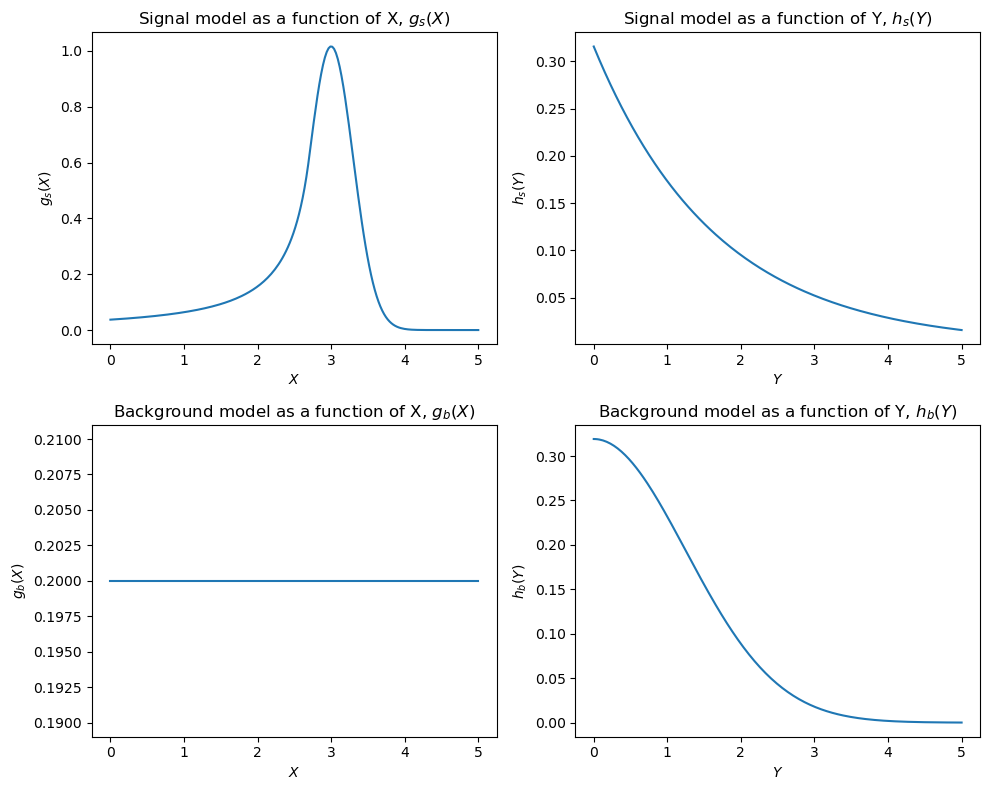

In [78]:
# Create a 2x2 grid of plots
fig, ax = plt.subplots(2, 2, figsize=(10, 8)) 

x = np.linspace(0, 5, 200)
y = np.linspace(0, 10, 200)

#plot the signal for X
ax[0,0].plot(x, g_s(x))
ax[0,0].set_title(r'Signal model as a function of X, $g_s(X)$')
ax[0,0].set_ylabel(r'$g_s(X)$')
ax[0,0].set_xlabel(r'$X$')

#plot the signal for Y
ax[0,1].plot(x, h_s(y))
ax[0,1].set_title(r'Signal model as a function of Y, $h_s(Y)$')
ax[0,1].set_ylabel(r'$h_s(Y)$')
ax[0,1].set_xlabel(r'$Y$')

#plot the background for X
ax[1,0].plot(x, g_b(x))
ax[1,0].set_title(r'Background model as a function of X, $g_b(X)$')
ax[1,0].set_ylabel(r'$g_b(X)$')
ax[1,0].set_xlabel(r'$X$')

#plot the background for Y
ax[1,1].plot(x, h_b(y))
ax[1,1].set_title(r'Background model as a function of Y, $h_b(Y)$')
ax[1,1].set_ylabel(r'$h_b(Y)$')
ax[1,1].set_xlabel(r'$Y$')

plt.tight_layout()


Numeric integration to show that they are normalised

In [50]:
#can change the parameters to ensure correct normalisation always
mu = 4
sigma = 9
beta = 12
m = 12
f = 0.8
lmbda = 9
mu_b = 2
sigma_b = 3


integral_g_s = scipy.integrate.quad(g_s, X_llim, X_ulim)
integral_h_s = scipy.integrate.quad(h_s, Y_llim, Y_ulim)
integral_g_b = scipy.integrate.quad(g_b, X_llim, X_ulim)
integral_h_b = scipy.integrate.quad(h_b, Y_llim, Y_ulim)

print(f'Integral of g_s is {integral_g_s[0]: 0.1f}, with error {integral_g_s[1]}.')
print(f'Integral of h_s is {integral_h_s[0]: 0.1f}, with error {integral_h_s[1]}.')
print(f'Integral of g_b is {integral_g_b[0]: 0.1f}, with error {integral_g_b[1]}.')
print(f'Integral of h_b is {integral_h_b[0]: 0.1f}, with error {integral_h_b[1]}.')

Integral of g_s is  1.0, with error 1.110223024625157e-14.
Integral of h_s is  1.0, with error 4.98081735191946e-13.
Integral of g_b is  1.0, with error 1.1102230246251569e-14.
Integral of h_b is  1.0, with error 4.109627083082046e-10.


Plot the probability distribution $P_X = g_b(X)+g_s(X)$ and $P_Y = h_b(Y)+h_s(Y)$ and make sure they are normalised.

In [51]:
#define original parameters again
mu = 3
sigma = 0.3
beta = 1
m = 1.4
f = 0.6
lmbda = 0.3
mu_b = 0
sigma_b = 2.5

In [82]:
def P_X(x):
    return (1-f) * g_b(x) + f * g_s(x)

def P_Y(y):
    return (1-f) * h_b(y) + f * h_s(y)

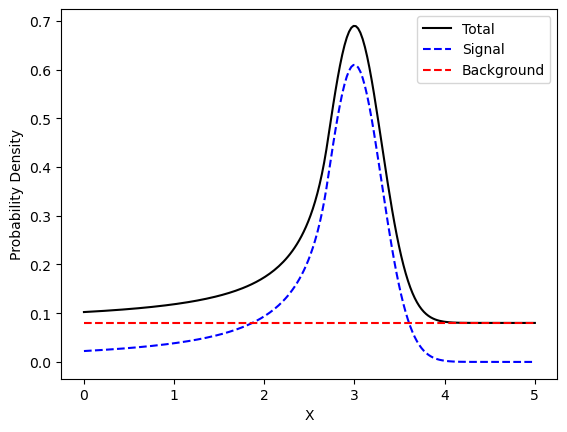

In [80]:
plt.plot(x, P_X(x), 'k-', label='Total')
plt.plot(x, f*g_s(x), 'b--', label='Signal')
plt.plot(x, (1-f)*g_b(x), 'r--', label='Background')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

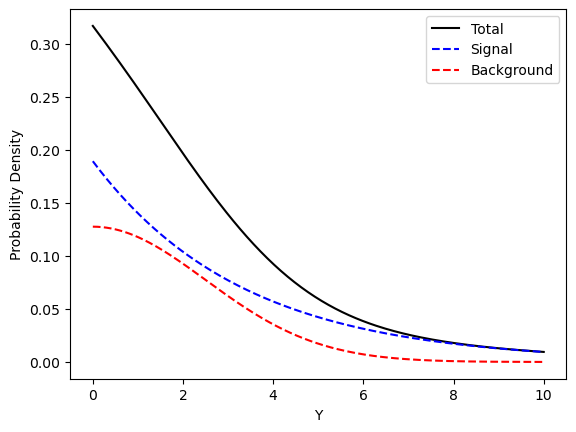

In [84]:
plt.plot(y, P_Y(y), 'k-', label='Total')
plt.plot(y, f*h_s(y), 'b--', label='Signal')
plt.plot(y, (1-f)*h_b(y), 'r--', label='Background')
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.legend()

Plot